In [1]:
import re
def process_sent(sentence):
    sentence = re.sub(" LSB.*?RSB", "", sentence)
    sentence = re.sub("LRB RRB ", "", sentence)
    sentence = re.sub("LRB", " ( ", sentence)
    sentence = re.sub("RRB", " )", sentence)
    sentence = re.sub("--", "-", sentence)
    sentence = re.sub("``", '"', sentence)
    sentence = re.sub("''", '"', sentence)

    return sentence

def process_wiki_title(title):
    title = re.sub("_", " ", title)
    title = re.sub("LRB", " ( ", title)
    title = re.sub("RRB", " )", title)
    title = re.sub("COLON", ":", title)
    return title

In [2]:
import json

# file = '/root/autodl-tmp/KernelGAT/KernelGAT/data/all_train.json'
# file = '/root/autodl-tmp/KernelGAT/KernelGAT/data/all_dev.json'
# file = '/root/autodl-tmp/KernelGAT/KernelGAT/data/all_test.json'
file = '/root/autodl-tmp/KernelGAT/data/bert_train.json'
with open(file, 'r') as f:
    for line in f:
        data = json.loads(line)
        for evid in data["evidence"]:
            evid[0] = process_wiki_title(evid[0])
            evid[2] = process_sent(evid[2])
        print(json.dumps(data, indent=4))
        break

{
    "id": 75397,
    "evidence": [
        [
            "Fox Broadcasting Company",
            0,
            "The Fox Broadcasting Company  (  often shortened to Fox and stylized as FOX  ) is an American English language commercial broadcast television network that is owned by the Fox Entertainment Group subsidiary of 21st Century Fox .",
            1.0
        ],
        [
            "Nikolaj Coster-Waldau",
            7,
            "He then played Detective John Amsterdam in the short lived Fox television series New Amsterdam  (  2008  ) , as well as appearing as Frank Pike in the 2009 Fox television film Virtuality , originally intended as a pilot .",
            1.0
        ],
        [
            "Nikolaj Coster-Waldau",
            8,
            "He became widely known to a broad audience for his current role as Ser Jaime Lannister , in the HBO series Game of Thrones .",
            0.1474965512752533
        ],
        [
            "Nikolaj Coster-Waldau",
          

In [2]:
import torch

t = torch.randint(0, 10, (2, 3, 4, 5))
print(t)

tensor([[[[8, 7, 4, 5, 1],
          [3, 7, 8, 2, 7],
          [3, 3, 7, 7, 4],
          [1, 6, 6, 4, 7]],

         [[8, 6, 5, 5, 1],
          [2, 7, 7, 0, 7],
          [3, 9, 5, 5, 2],
          [6, 2, 0, 7, 5]],

         [[9, 9, 5, 0, 1],
          [7, 0, 7, 2, 5],
          [9, 7, 4, 8, 9],
          [9, 7, 9, 7, 1]]],


        [[[0, 4, 5, 4, 6],
          [3, 3, 4, 5, 1],
          [2, 7, 3, 9, 9],
          [4, 1, 1, 4, 6]],

         [[9, 4, 5, 4, 4],
          [5, 7, 8, 5, 3],
          [4, 0, 1, 8, 1],
          [5, 2, 1, 7, 2]],

         [[4, 0, 8, 8, 2],
          [4, 7, 8, 0, 7],
          [3, 3, 6, 4, 9],
          [8, 2, 9, 0, 6]]]])


In [3]:
# size: (2, 1, 4, 1)
mask = [
    [
        [
            [0],
            [1],
            [0],
            [1]
        ]
    ],
    [
        [
            [1],
            [1],
            [0],
            [0]
        ]
    ]
]
mask = torch.tensor(mask)
print(mask.size())
print(mask)

torch.Size([2, 1, 4, 1])
tensor([[[[0],
          [1],
          [0],
          [1]]],


        [[[1],
          [1],
          [0],
          [0]]]])


In [5]:
print(t)
print(t * mask)

tensor([[[[8, 7, 4, 5, 1],
          [3, 7, 8, 2, 7],
          [3, 3, 7, 7, 4],
          [1, 6, 6, 4, 7]],

         [[8, 6, 5, 5, 1],
          [2, 7, 7, 0, 7],
          [3, 9, 5, 5, 2],
          [6, 2, 0, 7, 5]],

         [[9, 9, 5, 0, 1],
          [7, 0, 7, 2, 5],
          [9, 7, 4, 8, 9],
          [9, 7, 9, 7, 1]]],


        [[[0, 4, 5, 4, 6],
          [3, 3, 4, 5, 1],
          [2, 7, 3, 9, 9],
          [4, 1, 1, 4, 6]],

         [[9, 4, 5, 4, 4],
          [5, 7, 8, 5, 3],
          [4, 0, 1, 8, 1],
          [5, 2, 1, 7, 2]],

         [[4, 0, 8, 8, 2],
          [4, 7, 8, 0, 7],
          [3, 3, 6, 4, 9],
          [8, 2, 9, 0, 6]]]])
tensor([[[[0, 0, 0, 0, 0],
          [3, 7, 8, 2, 7],
          [0, 0, 0, 0, 0],
          [1, 6, 6, 4, 7]],

         [[0, 0, 0, 0, 0],
          [2, 7, 7, 0, 7],
          [0, 0, 0, 0, 0],
          [6, 2, 0, 7, 5]],

         [[0, 0, 0, 0, 0],
          [7, 0, 7, 2, 5],
          [0, 0, 0, 0, 0],
          [9, 7, 9, 7, 1]]],


     

In [2]:
import dgl
import dgl.nn

In [9]:
import networkx as nx
import json
from tqdm import tqdm

In [30]:
file = '/root/autodl-tmp/KernelGAT/data/wikidata5m_transductive/wikidata5m_transductive_train.txt'
edges = []
ht2r = dict()
with open(file, 'r') as f:
    for line in f:
        h, p, t = line.strip().split("\t")
        edge = (h, t)
        edges.append(edge)
        ht2r[str(edge)] = p
        # break

In [33]:
G = nx.DiGraph()
G.add_edges_from(edges)

In [ ]:
pos = nx.spring_layout(G) #也可以不固定点
nx.draw_networkx_edge_labels(G, pos, font_size=14)#绘制图中边的权重

In [ ]:
print("nodes:", G.nodes())      #输出全部的节点： [1, 2, 3]
print("edges:", G.edges())      #输出全部的边：[(2, 3)]
print("number of edges:", G.number_of_edges())   #输出边的数量

In [15]:
# 计算两点间的最短路
# dijkstra_path
print('dijkstra方法寻找最短路径：')
path=nx.dijkstra_path(G, source='Q5', target='Q8')
print('节点Q5到Q8的路径：', path)
# print('dijkstra方法寻找最短距离：')
# distance=nx.dijkstra_path_length(G, source='H', target='F')
# print('节点H到F的距离为：', distance)

dijkstra方法寻找最短路径：
节点Q5到Q8的路径： ['Q5', 'Q5859894', 'Q8']


In [16]:
source = 'Q101'
target = 'Q2392096'
path=nx.dijkstra_path(G, source=source, target=target)
print(f"节点{source}到{target}的路径：", path)

节点Q101到Q2392096的路径： ['Q101', 'Q35497', 'Q26706969', 'Q1860', 'Q1553', 'Q2392096']


In [34]:
entity_alias_file = '/root/autodl-tmp/KernelGAT/data/wikidata5m_alias/wikidata5m_entity.txt'
entity_id2alias = dict()
entity_alias2id = dict()
with open(entity_alias_file, 'r') as f:
    for line in f:
        splits = line.strip().split("\t")
        entity_id = splits[0]
        alias_list = splits[1:]
        entity_id2alias[entity_id] = alias_list
        for alias in alias_list:
            entity_alias2id[alias] = entity_id

In [29]:
relation_alias_file = '/root/autodl-tmp/KernelGAT/data/wikidata5m_alias/wikidata5m_relation.txt'
relation_id2alias = dict()
relation_alias2id = dict()
with open(relation_alias_file, 'r') as f:
    for line in f:
        splits = line.strip().split("\t")
        item_id = splits[0]
        alias_list = splits[1:]
        relation_id2alias[item_id] = alias_list
        for alias in alias_list:
            relation_alias2id[alias] = item_id

In [35]:
noun_1 = "Nikolaj Coster-Waldau"
noun_2 = "Fox Broadcasting Company"
entity_id_1 = entity_alias2id[noun_1]
entity_id_2 = entity_alias2id[noun_2]
print(entity_id_1, entity_id_2)

Q445772 Q166419


In [36]:
source = entity_id_1
target = entity_id_2
path = nx.dijkstra_path(G, source=source, target=target)

In [39]:
print(f"节点{source}到{target}的路径：", path)
for i in range(1, len(path)):
    h = path[i - 1]
    t = path[i]
    edge = (h, t)
    r = ht2r[str(edge)]
    h_alias = entity_id2alias[h][0]
    t_alias = entity_id2alias[t][0]
    r_alias = relation_id2alias[r][0]
    print(f"{h_alias} >> {r_alias} >> {t_alias}")   

节点Q445772到Q166419的路径： ['Q445772', 'Q2530270', 'Q299700', 'Q18154845', 'Q391629', 'Q166419']
Nikolaj Coster-Waldau >> nominated for >> Screen actors guild award for outstanding performance by an ensemble in a drama series
Screen actors guild award for outstanding performance by an ensemble in a drama series >> winner >> Kim Dae-hyeon
Kim Dae-hyeon >> nominated for >> teen choice award for choice tv actor action
teen choice award for choice tv actor action >> instance of >> list of teen choice awards performers
list of teen choice awards performers >> organizer >> the fox broadcasting company


In [54]:
noun_1 = "Ryan Seacrest"
noun_2 = "person"
entity_id_1 = entity_alias2id[noun_1]
entity_id_2 = entity_alias2id[noun_2]
print(entity_id_1, entity_id_2)

source = entity_id_1
target = entity_id_2
path = nx.dijkstra_path(G, source=source, target=target)

print(f"节点{source}到{target}的路径：", path)
for i in range(1, len(path)):
    h = path[i - 1]
    t = path[i]
    edge = (h, t)
    r = ht2r[str(edge)]
    h_alias = entity_id2alias[h][0]
    t_alias = entity_id2alias[t][0]
    r_alias = relation_id2alias[r][0]
    print(f"{h_alias} >> {r_alias} >> {t_alias}")

Q299266 Q5
节点Q299266到Q5的路径： ['Q299266', 'Q5']
John Renold Aufenstein >> instance of >> Huamn


In [ ]:
# -*- coding:utf-8 -*-
# Author:Zhou Yang
# Time:2019/3/30



import tagme
import logging
import sys
import os.path

# 标注的“Authorization Token”，需要注册才有
tagme.GCUBE_TOKEN = "6b362171-ff34-4097-a1c2-df426a5b7452-843339462"

program = os.path.basename(sys.argv[0])
logger = logging.getLogger(program)
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')

def Annotation_mentions(txt):
    """
    发现那些文本中可以是维基概念实体的概念
    :param txt: 一段文本对象，str类型
    :return: 键值对，键为本文当中原有的实体概念，值为该概念作为维基概念的概念大小，那些属于维基概念但是存在歧义现象的也包含其内
    """
    annotation_mentions = tagme.mentions(txt)
    dic = dict()
    for mention in annotation_mentions.mentions:
        try:
            dic[str(mention).split(" [")[0]] = str(mention).split("] lp=")[1]
        except:
            logger.error('error annotation_mention about ' + mention)
    return dic


def Annotate(txt, language="en", theta=0.1):
    """
    解决文本的概念实体与维基百科概念之间的映射问题
    :param txt: 一段文本对象，str类型
    :param language: 使用的语言 “de”为德语, “en”为英语，“it”为意语.默认为英语“en”
    :param theta:阈值[0, 1]，选择标注得分，阈值越大筛选出来的映射就越可靠，默认为0.1
    :return:键值对[(A, B):score]  A为文本当中的概念实体，B为维基概念实体，score为其得分
    """
    annotations = tagme.annotate(txt, lang=language)
    dic = dict()
    for ann in annotations.get_annotations(theta):
        # print(ann)
        try:
            A, B, score = str(ann).split(" -> ")[0], str(ann).split(" -> ")[1].split(" (score: ")[0], str(ann).split(" -> ")[1].split(" (score: ")[1].split(")")[0]
            dic[(A, B)] = score
        except:
            logger.error('error annotation about ' + ann)
    return dic


if __name__ == '__main__':
    f = open("text.txt", "r", encoding="utf8")
    txt = f.read()
    obj = Annotation_mentions(txt)
    for i in obj.keys():
        print(i + "  " + obj[i])
    print("=" * 30)
    obj = Annotate(txt, theta=0.2)
    for i in obj.keys():
        print(i[0] + " ---> " + i[1] + "  " + obj[i])

    pass


In [26]:
import tagme
import json
from tqdm import tqdm
import re
# Set the authorization token for subsequent calls.
tagme.GCUBE_TOKEN = "6b362171-ff34-4097-a1c2-df426a5b7452-843339462"

In [5]:
train_file = '/root/autodl-tmp/KernelGAT/data/bert_train.json'
id2claims = {}
with open(train_file, 'r') as f:
    for line in f:
        data = json.loads(line)
        # print(json.dumps(data, indent=4))
        item_id = data['id']
        claim = data['claim']
        id2claims[item_id] = claim
        # break

In [23]:
claims = list(id2claims.values())

In [37]:
def match(input_string):
    pattern = r'(.+?) -> (.+?) \(score: (.+?)\)'
    matches = re.match(pattern, input_string)

    if matches:
        original_name = matches.group(1)
        normalized_name = matches.group(2)
        score = matches.group(3)

        # print("Original Name:", original_name)
        # print("Normalized Name:", normalized_name)
        # print("Score:", score)
        return (original_name, normalized_name, score)
    else:
        # print("No match found.")
        return None

# Print annotations with a score higher than 0.1
id2splits = dict()
for item_id, claim in tqdm(id2claims.items()):
    # print("claim: ", item_id, claim)
    splits = []
    try:
        lunch_annotations = tagme.annotate(claim)
        for ann in lunch_annotations.get_annotations(0.1):
            mention, entity, score = match(str(ann))
            # print(mention, " >> ", entity, score)
            splits.append([mention, entity, score])
    except:
            print('error annotation about: ', item_id, claim)
    id2splits[item_id] = splits

  0%|          | 13/145449 [00:19<61:11:59,  1.51s/it]

error annotation about:  76253 There is a movie called The Hunger Games.


  0%|          | 18/145449 [00:34<81:26:23,  2.02s/it] 

In [10]:
tomatoes_mentions = tagme.mentions("I definitely like ice cream better than tomatoes.")

for mention in tomatoes_mentions.mentions:
    print(mention)

ice cream [18,27] lp=0.18749085068702698
tomatoes [40,48] lp=0.004235605709254742


In [14]:
import json
from tqdm import tqdm
import networkx as nx

entity_alias_file = "/root/autodl-tmp/KernelGAT/data/wikidata5m_alias/wikidata5m_entity.txt"
relation_alias_file = "/root/autodl-tmp/KernelGAT/data/wikidata5m_alias/wikidata5m_relation.txt"
kg_file = "/root/autodl-tmp/KernelGAT/data/wikidata5m_transductive/wikidata5m_transductive_train.txt"

In [15]:
def get_alias_id_map(alias_file):
    with open(alias_file, 'r') as f:
        id2aliasList = {}
        alias2id = {}
        for line in f.readlines():
            # entity splits example: ['Q5460288', 'Flora Zeta', 'flora cheong-leen', 'flora zeta', 'Flora Cheong-Leen']
            # relation splits example: ['P834', 'train depot', 'railway depot', 'depot', 'rail yard']
            splits = line.strip().split("\t")
            item_id, alias_list = splits[0], splits[1:]
            id2aliasList[item_id] = alias_list
            for alias in alias_list:
                alias2id[alias] = item_id
    return id2aliasList, alias2id

entity_id2aliasList, entity_alias2id = get_alias_id_map(entity_alias_file)
relation_id2aliasList, relation_alias2id = get_alias_id_map(relation_alias_file)

In [51]:
edges = []
ht2r = {}
hr2t = {}
rt2h = {}
next_entities = {}
prev_entities = {}
next_relations = {}
prev_relations = {}
with open(kg_file, 'r') as f:
    for line in f:
        head, relation, tail = line.strip().split("\t")
        edge = (head, tail)
        edges.append(edge)
        ht2r[str(edge)] = relation
        hr2t[str((head, relation))] = tail
        rt2h[str((relation, tail))] = head
        if head not in next_entities:
            next_entities[head] = set([tail])
        else:
            next_entities[head].add(tail)
        if tail not in prev_entities:
            prev_entities[tail] = set([head])
        else:
            prev_entities[tail].add(head)
        if head not in next_relations:
            next_relations[head] = set([relation])
        else:
            next_relations[head].add(relation)
        if tail not in prev_relations:
            prev_relations[tail] = set([relation])
        else:
            prev_relations[tail].add(relation)
        

In [69]:
G = nx.DiGraph()
G.add_edges_from(edges)

In [26]:
import spacy
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

In [48]:
def check(item, entity_list):
    for entity in entity_list:
        if item in entity:
            return False
    return True

In [76]:
claim_file = '/root/autodl-tmp/KernelGAT/data/tagme_bert_dev.jsonl'
num = 0
with open(claim_file, 'r') as f:
    for line in tqdm(f.readlines()[:10]):
        data = json.loads(line)
        claim = data['claim']
        claim_tagme = data['claim_tagme']
        entity_list = [item[1] for item in claim_tagme]
        entity_list = list(set(entity_list))
        entity_id_list = [entity_alias2id[entity] for entity in entity_list]

        label = data['label']
        evidence = data['evidence']

        sub_G = G.subgraph(entity_id_list)
        print("claim: ", claim)
        print(sub_G)
        print(sub_G.edges)
        for edge in sub_G.edges:
            head_id, tail_id = edge
            relation_id = ht2r[str((head_id, tail_id))]
            head_alias = entity_id2aliasList[head_id][0]
            tail_alias = entity_id2aliasList[tail_id][0]
            relation_alias = relation_id2aliasList[relation_id][0]
            print(f"{head_alias} >> {relation_alias} >> {tail_alias}")
        print("=====" * 20)

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:01,  6.67it/s]

claim:  Colin Kaepernick became a starting quarterback during the 49ers 63rd season in the National Football League.
DiGraph with 6 nodes and 3 edges
[('Q82496', 'Q337758'), ('Q82496', 'Q622747'), ('Q213347', 'Q2736')]
käpernick >> member of sports team >> san francisco 49er
käpernick >> position played on team / speciality >> audible (american football)
The Football League >> sport >> futebol
claim:  Tilda Swinton is a vegan.
DiGraph with 2 nodes and 0 edges
[]
claim:  Fox 2000 Pictures released the film Soul Food.


 50%|█████     | 5/10 [00:00<00:00, 13.44it/s]

DiGraph with 3 nodes and 1 edges
[('Q434841', 'Q11424')]
Twentieth Century-Fox >> industry >> movie
claim:  Anne Rice was born in New Jersey.
DiGraph with 2 nodes and 0 edges
[]
claim:  Telemundo is a English-language television network.
DiGraph with 3 nodes and 1 edges
[('Q136538', 'Q1254874')]
Telemundo Media >> instance of >> tv network
claim:  Damon Albarn's debut album was released in 2011.


100%|██████████| 10/10 [00:00<00:00, 17.32it/s]

DiGraph with 2 nodes and 0 edges
[]
claim:  There is a capital called Mogadishu.
DiGraph with 2 nodes and 0 edges
[]
claim:  Savages was exclusively a German film.
DiGraph with 3 nodes and 1 edges
[('Q1213010', 'Q11424')]
Savages >> instance of >> movie
claim:  Happiness in Slavery is a gospel song by Nine Inch Nails.
DiGraph with 3 nodes and 1 edges
[('Q2602279', 'Q11647')]
happiness in slavery >> performer >> collected (dvd)
claim:  Andrew Kevin Walker is only Chinese.
DiGraph with 2 nodes and 1 edges
[('Q148', 'Q148')]
prc (china) >> country >> prc (china)


In [79]:
claim_file = '/root/autodl-tmp/KernelGAT/data/tagme_bert_dev.jsonl'
num = 0
with open(claim_file, 'r') as f:
    for line in tqdm(f.readlines()[:1000]):
        data = json.loads(line)
        claim = data['claim']
        claim_tagme = data['claim_tagme']
        entity_list = [item[1] for item in claim_tagme]
        entity_list = list(set(entity_list))

        label = data['label']
        evidence = data['evidence']
        paths = []
        path_2 = []
        for i in range(len(entity_list)):
            for j in range(len(entity_list)):
                if i == j:
                    continue
                head_alias = entity_list[i]
                tail_alias = entity_list[j]
                if head_alias in entity_alias2id and tail_alias in entity_alias2id:
                    head_id = entity_alias2id[head_alias]
                    tail_id = entity_alias2id[tail_alias]
                else:
                    continue
                
                if head_id in next_entities and tail_id in next_entities[head_id]:
                    relation_id = ht2r[str((head_id, tail_id))]
                    # print(f"{head_id} >> {relation_id} >> {tail_id}")
                    # print(f"{head_alias} >> {relation_id2aliasList[relation_id][0]} >> {tail_alias}")
                    # print("*****" * 10)
                    paths.append(f"{head_alias} >> {relation_id2aliasList[relation_id][0]} >> {tail_alias}")

                if head_id in next_entities and tail_id in prev_entities:
                    mid_ids = next_entities[head_id].intersection(prev_entities[tail_id])
                    if len(mid_ids) > 0:
                        for mid_id in mid_ids:
                            relation_id_1st = ht2r[str((head_id, mid_id))]
                            relation_id_2nd = ht2r[str((mid_id, tail_id))]
                            # print(f"{head_alias} >> {relation_id2aliasList[relation_id_1st][0]} >> {entity_id2aliasList[mid_id][0]} >> {relation_id2aliasList[relation_id_2nd][0]} >> {tail_alias}")
                            # print("*****" * 10)
                            paths.append(f"{head_alias} >> {relation_id2aliasList[relation_id_1st][0]} >> {entity_id2aliasList[mid_id][0]} >> {relation_id2aliasList[relation_id_2nd][0]} >> {tail_alias}")
            # paths = paths[:1]

            head_alias = entity_list[i]
            
            if head_alias in entity_alias2id:
                head_id = entity_alias2id[head_alias]
            if head_id in next_relations:
                for relation_id in next_relations[head_id]:
                    if relation_id in relation_id2aliasList:
                        relation_aliasList = relation_id2aliasList[relation_id]
                        # print(relation_aliasList)
                        for rel_ali in relation_aliasList:
                            splits = rel_ali.split()
                            for split in splits:
                                if split not in stopwords and split not in head_alias and split in claim:
                                # if split not in stopwords and check(split, entity_list) and split in claim:
                                    reason_tail_id = hr2t[str((head_id, relation_id))]
                                    reason_tail_alias = entity_id2aliasList[reason_tail_id][0]
                                    path = f"{head_alias} >> {rel_ali} >> {reason_tail_alias}"
                                    # print(path)
                                    path_2.append(path)
                                    break
            # paths = paths[:2]

            # tail_alias = entity_list[i]
            # if tail_alias in entity_alias2id:
            #     tail_id = entity_alias2id[tail_alias]
            # if tail_id in prev_relations:
            #     for relation_id in prev_relations[tail_id]:
            #         if relation_id in relation_id2aliasList:
            #             relation_aliasList = relation_id2aliasList[relation_id]
            #             # print(relation_aliasList)
            #             for rel_ali in relation_aliasList:
            #                 splits = rel_ali.split()
            #                 for split in splits:
            #                     if split not in stopwords and split in claim:
            #                         reason_head_id = rt2h[str((relation_id, tail_id))]
            #                         reason_head_alias = entity_id2aliasList[reason_head_id][0]
            #                         path = f"{reason_head_alias} >> {rel_ali} >> {tail_alias}"
            #                         # print(path)
            #                         paths.append(path)
            #                         break

        if len(paths) > 0:
            num += 1
            print("====" * 20)
            print("claim: ", claim)
            print("label: ", label)
            print("evidence: ")
            for idx, evid in enumerate(evidence):
                print(f"{idx}\t{evid[0]}\t{evid[2]}")
            print("kg_ht:")
            for idx, path in enumerate(paths):
                print(f"{idx}\t{path}")
            print("kg_hr:")
            for idx, path in enumerate(path_2):
                print(f"{idx}\t{path}")
                
        # break

  0%|          | 0/1000 [00:00<?, ?it/s]

 82%|████████▏ | 818/1000 [00:00<00:00, 3900.99it/s]

claim:  Colin Kaepernick became a starting quarterback during the 49ers 63rd season in the National Football League.
label:  NOT ENOUGH INFO
evidence: 
0	Colin_Kaepernick	He remained the team 's starting quarterback for the rest of the season and went on to lead the 49ers to their first Super Bowl appearance since 1994 , losing to the Baltimore Ravens .
1	Colin_Kaepernick	In the following seasons , Kaepernick lost and won back his starting job , with the 49ers missing the playoffs for three years consecutively .
2	Colin_Kaepernick	During the 2013 season , his first full season as a starter , Kaepernick helped the 49ers reach the NFC Championship , losing to the Seattle Seahawks .
3	Colin_Kaepernick	Kaepernick began his professional career as a backup to Alex Smith , but became the 49ers ' starter in the middle of the 2012 season after Smith suffered a concussion .
4	Colin_Kaepernick	Colin Rand Kaepernick LRB LSB ` kæpərnɪk RSB ; born November 3 , 1987 RRB is an American football quarte

100%|██████████| 1000/1000 [00:00<00:00, 3661.13it/s]

claim:  Australia (2008 film) production took place in Bowen.
label:  SUPPORTS
evidence: 
0	Australia_-LRB-2008_film-RRB-	Production took place in Sydney , Darwin , Kununurra , and Bowen .
1	Australia_-LRB-2008_film-RRB-	Australia is a 2008 Australian American British romantic historical adventure drama film directed by Baz Luhrmann and starring Nicole Kidman and Hugh Jackman .
2	Australia_-LRB-2008_film-RRB-	The film was released to cinemas on 26 November 2008 in both the United States and Australia , with subsequent worldwide release dates throughout late December 2008 and January and February 2009 .
3	Australia_-LRB-2008_film-RRB-	The film is a character story , set between 1939 and 1942 against a dramatised backdrop of events across northern Australia at the time , such as the bombing of Darwin during World War II .
4	Australia_-LRB-2008_film-RRB-	It is the third highest grossing Australian film of all time , behind Crocodile Dundee and Mad Max : Fury Road .
kg_ht:
0	Mamma Mia! (fi

In [47]:
print(num)

551


In [9]:
import spacy
import textacy

# Subject Verb Object detection


class KnowledgeExtraction:

    def retrieveKnowledge(self, textInput):
        print(textInput)
        nlp = spacy.load('en_core_web_sm')
        text = nlp(textInput)
        print(text)
        text_ext = textacy.extract.subject_verb_object_triples(text)
        print(list(text_ext))
        return list(text_ext)

In [10]:
kgExtObj = KnowledgeExtraction()

In [13]:
inputText = "Colin Kaepernick became a starting quarterback during the 49ers 63rd season in the National Football League"
# inputText = "Technology bears fruit for nation's farmers"
inputText = "Fox 2000 Pictures released the film Soul Food."
sop_list = kgExtObj.retrieveKnowledge(inputText)
print(sop_list)
#list_sop = sop_list.as_doc()
sop_list_strings = []
for sop in sop_list:
    temp = []
    temp.append(sop[0].text)
    temp.append(sop[1].text)
    temp.append(sop[2].text)
    sop_list_strings.append(temp)

print(sop_list_strings)

Fox 2000 Pictures released the film Soul Food.
Fox 2000 Pictures released the film Soul Food.
[SVOTriple(subject=[Pictures], verb=[released], object=[film])]
[]
[]


In [77]:
import networkx as nx

def get_subgraph(G, nodes):
    sub_nodes = set(nodes)
    for node in nodes:
        sub_nodes.update(nx.ancestors(G, node))
        sub_nodes.update(nx.descendants(G, node))
    return G.subgraph(sub_nodes)

# Example usage:
GG = nx.DiGraph()
edges = [(7, 4), (3, 8), (3, 2), (3, 0), (3, 1), (7, 5), (7, 6), (7, 8)]
GG.add_edges_from(edges)

H = get_subgraph(GG, [0, 6, 7, 8])
print(sorted(H.edges()))


[(3, 0), (3, 8), (7, 4), (7, 5), (7, 6), (7, 8)]


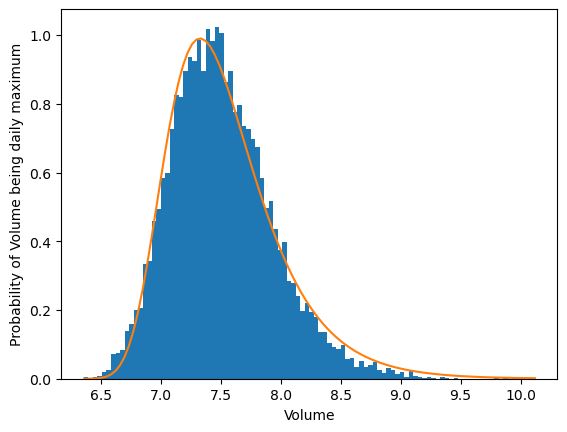

In [2]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
mean_hunger = 5
samples_per_day = 100
n_days = 10000
samples = np.random.normal(loc=mean_hunger, size=(n_days, samples_per_day))
daily_maxes = np.max(samples, axis=1)

def gumbel_pdf(prob,loc,scale):
    z = (prob-loc)/scale
    return np.exp(-z-np.exp(-z))/scale

def plot_maxes(daily_maxes):
    probs,hungers,_=plt.hist(daily_maxes,density=True,bins=100)
    plt.xlabel('Volume')
    plt.ylabel('Probability of Volume being daily maximum')
    (loc,scale),_=curve_fit(gumbel_pdf,hungers[:-1],probs)
    #curve_fit用于曲线拟合
    #接受需要拟合的函数（函数的第一个参数是输入，后面的是要拟合的函数的参数）、输入数据、输出数据
    #返回的是函数需要拟合的参数
    # https://blog.csdn.net/guduruyu/article/details/70313176
    plt.plot(hungers,gumbel_pdf(hungers,loc,scale))
    
plt.figure()
plot_maxes(daily_maxes)


In [10]:
import torch
import torch.nn.functional as F

logits = torch.rand(3, 2)
softmax = F.softmax(logits, dim=-1)
gumbel_softmax = F.gumbel_softmax(logits=logits, tau=0.1, hard=False, dim=-1)
print(logits)
print(softmax)
print(gumbel_softmax)

tensor([[0.4128, 0.6983],
        [0.1022, 0.9867],
        [0.9717, 0.3510]])
tensor([[0.4291, 0.5709],
        [0.2923, 0.7077],
        [0.6504, 0.3496]])
tensor([[6.5713e-01, 3.4287e-01],
        [6.3556e-06, 9.9999e-01],
        [9.7593e-08, 1.0000e+00]])


In [3]:
import torch
a = torch.rand(2,3).requires_grad_()
b = a[1, :2]
c = torch.sum(b)
print(a)
print(b)
print(c)
c.backward()
print(a.grad)

tensor([[0.3087, 0.2637, 0.2659],
        [0.7329, 0.7495, 0.2011]], requires_grad=True)
tensor([0.7329, 0.7495], grad_fn=<SliceBackward0>)
tensor(1.4825, grad_fn=<SumBackward0>)
tensor([[0., 0., 0.],
        [1., 1., 0.]])


In [16]:
import torch
a = torch.rand(3, 4).requires_grad_()
b = torch.rand(3).requires_grad_()
mask = torch.where(b > 0.5, b, False)
print(a)
print(b)
print(mask)
c = a[mask]
print(c)
d = torch.sum(c)
print(d)
d.backward()
print(a.grad)
print(mask.grad)
print(b.grad)

tensor([[0.0596, 0.1739, 0.6884, 0.0593],
        [0.3291, 0.3394, 0.5541, 0.6713],
        [0.1064, 0.5755, 0.0213, 0.3579]], requires_grad=True)
tensor([0.2599, 0.3786, 0.2729], requires_grad=True)
tensor([False, False, False])
tensor([], size=(0, 4), grad_fn=<IndexBackward0>)
tensor(0., grad_fn=<SumBackward0>)
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
None
None


In [5]:
import numpy as np

def generate_edge_mask(binary_vector):
    # 计算二进制向量的外积并按行重复以匹配矩阵的维度
    outer_product = np.outer(binary_vector, binary_vector)
    # 使用单位矩阵与外积进行逐元素相乘
    # edge_mask = outer_product * np.eye(len(binary_vector))
    return outer_product

# 示例二进制向量表示选中节点的情况
binary_vector = np.array([0.9, 0.00005, 0.99, 0.1, 1]).round(4)
# 生成边缘掩码
edge_mask = generate_edge_mask(binary_vector)

print("Edge mask:")
print(edge_mask)


Edge mask:
[[0.81   0.     0.891  0.09   0.9   ]
 [0.     0.     0.     0.     0.    ]
 [0.891  0.     0.9801 0.099  0.99  ]
 [0.09   0.     0.099  0.01   0.1   ]
 [0.9    0.     0.99   0.1    1.    ]]


In [7]:
import dgl
import torch as th
import scipy.sparse as sp
spmat = sp.rand(100, 100, density=0.05) # 5%非零项
G = dgl.from_scipy(spmat)                   # 来自SciPy
print(G)

Graph(num_nodes=100, num_edges=500,
      ndata_schemes={}
      edata_schemes={})
